---
title: "Cancer Relates to Race?"
description: "Cancer data research"
author: "Weikeng Yang"
date: "2023-07-31"
date modified: "2023-08-01"
categories: [cancer, data, analysis]
---


![Aggregating Data Hides Cancer Disparities Affecting Asian and NHPI Patients  in the US - Cancer Therapy Advisor](https://www.cancertherapyadvisor.com/wp-content/uploads/sites/12/2023/01/woman-with-cancer-with-doctor_G_364273373-860x573.jpg)

# Introduction
This project aims to analyze the cancer death rate differences in Unites States by states. 



## Data Description
The data used in this study were retrieved from the CORGIS project, it is information about the rates of cancer deaths in each state is reported. The data shows the total rate as well as rates based on sex, age, and race. Rates are also shown for three specific kinds of cancer: breast cancer, colorectal cancer, and lung cancer. The data is collected from 2007-2013. 

[Dataset Link](https://corgis-edu.github.io/corgis/csv/cancer/)

USDA Economic Research Service: https://data.ers.usda.gov/reports.aspx?ID=17829#P20da6056f1564446b1aeb037b0be4abe_4_244iT2

## Motivations: 

Cancer, a main health problem for us to care about. By examining cancer death rates based on sex, age, and race, researchers can gain insights into how different demographic groups may be affected by cancer. This can help identify populations that are particularly vulnerable or may require targeted interventions. To understand the risk factors, we may help those people who we care about to avoid cancer. 


## Main Research Questions:

- Are there significant differences in total cancer rates among states? Which states have the highest and lowest overall cancer death rates?
- Which types of cancer have the highest death rates overall, and how do these rates vary by state?
- How do cancer rates differ between males and females, and across different age groups?
- Are there variations in cancer rates based on different racial or ethnic groups? Are race and ethnicity risk factors for cancer?
- Are there any correlations between cancer death rates and other factors, such as socioeconomic status or access to healthcare?


# Methods

This study was conducted based on data from CORGIS Dataset Project. To analyze data, investigate correlation between death rate and other factors, python and python library are used. 


## Library Imports & Read Data
Package is pre-installed for you if you access through binder. 

Execute the following cell for important imports.

In [10]:
from bs4 import BeautifulSoup
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
# Retrieve the htmnl code of the CORGIS webpage
url = "https://corgis-edu.github.io/corgis/csv/"
response = requests.get(url)
html = response.text
status = response.status_code
soup = BeautifulSoup(html, "html.parser")
h3_contents = soup.find_all('h3')
h3_list = []
for h3_tag in h3_contents:
  h3_list.append(h3_tag.text)
# reference: Assignment 4
def pdcorgis(a):
  try:
    dataset = a.lower()
    dataset = dataset.replace(' ', '_')
    dataset_url = f"https://corgis-edu.github.io/corgis/csv/{dataset}/"
    response = requests.get(dataset_url)
    html_code = response.text
    status = response.status_code
    soup = BeautifulSoup(html_code, 'html.parser')
    links = soup.find_all('a')
    download_link = None
    for i in links: 
      if i.has_attr('download'):
        download_link = i['href']
        break 
    if download_link:
      csv_url = f"https://corgis-edu.github.io/corgis/csv/{dataset}/{download_link}"
      corgisdf = pd.read_csv(csv_url)
      return corgisdf
    else:
      return None
  except:
    print("An exception ocurred")
# the dataframe we need for the research
df = pdcorgis("Cancer")


## Dataset Overview

This section is for have a general overview and understanding for the dataset of this project. 

In [11]:
print(df.info())
print(df.describe())
# printing the first 5 rows of dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         51 non-null     object 
 1   Total.Rate                                    51 non-null     float64
 2   Total.Number                                  51 non-null     float64
 3   Total.Population                              51 non-null     float64
 4   Rates.Age.< 18                                51 non-null     float64
 5   Rates.Age.18-45                               51 non-null     float64
 6   Rates.Age.45-64                               51 non-null     float64
 7   Rates.Age.> 64                                51 non-null     float64
 8   Rates.Age and Sex.< 18.Female                 51 non-null     float64
 9   Rates.Age and Sex.< 18.Male                   51 non-null     float

,State,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.< 18.Female,Rates.Age and Sex.< 18.Male,...,Types.Lung.Age and Sex.Male.45 - 64,Types.Lung.Age and Sex.Female.> 64,Types.Lung.Age and Sex.Male.> 64,Types.Lung.Race.White,Types.Lung.Race.White non-Hispanic,Types.Lung.Race.Black,Types.Lung.Race.Black non-Hispanic,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic
0,Alabama,214.2,71529.0,33387205.0,2.0,18.5,244.7,1017.8,2.0,2.1,...,102.9,221.7,457.4,59.9,60.4,52.6,52.8,23.0,22.9,14.8
1,Alaska,128.1,6361.0,4966180.0,1.7,11.8,170.9,965.2,0.0,0.0,...,50.3,268.3,335.0,48.7,49.5,45.6,47.9,33.0,74.4,0.0
2,Arizona,165.6,74286.0,44845598.0,2.5,13.6,173.6,840.2,2.6,2.5,...,47.0,191.9,275.8,39.5,42.2,38.2,40.4,21.3,11.1,21.6
3,Arkansas,223.9,45627.0,20382448.0,2.3,17.6,250.1,1048.3,2.6,2.0,...,106.5,248.7,484.7,63.4,64.2,62.9,63.0,18.1,16.2,14.6
4,California,150.9,393980.0,261135696.0,2.6,13.7,163.7,902.4,2.4,2.8,...,36.8,192.5,269.0,37.2,42.6,46.5,48.6,25.8,18.4,18.3


We could see that there are mainly 4 age groups of metadata in this dataset. However, the metadata names are not canonical and not organized. For example, the data in the columns of Breast Cancer didn't collect the data by sex, comparing to colorectal and lung cancer. 
And for all these three types of cancer doesn't have the data for age below 18. 

In [12]:
# getting the columns of the dataset
columns = list(df.columns)

In [13]:
# examining missing values
print("Missing values distribution: ")
print(df.isnull().mean())

Missing values distribution: 
State                                 0.0
Total.Rate                            0.0
Total.Number                          0.0
Total.Population                      0.0
Rates.Age.< 18                        0.0
                                     ... 
Types.Lung.Race.Black                 0.0
Types.Lung.Race.Black non-Hispanic    0.0
Types.Lung.Race.Asian                 0.0
Types.Lung.Race.Indigenous            0.0
Types.Lung.Race.Hispanic              0.0
Length: 75, dtype: float64


A map would be helpful to 

In [68]:
import plotly.express as px
# for using plotly, we need to convert full state name to their abbreviations in python since it does not recoginze full name of state
# reference for this:https://gist.github.com/rogerallen/1583593 (A Python Dictionary to translate US States to Two letter codes)
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
df['Abbreviation'] = df['State'].map(us_state_to_abbrev)
# Create the choropleth map
fig = px.choropleth(df,
                    locations=df['Abbreviation'],
                    locationmode='USA-states',  # set the location mode to 'country names' for USA states
                    color='Total.Rate',  # the variable to be represented by color
                    hover_name='State',  # the values to be displayed when hovering over each state
                    scope='usa',  # set the scope to 'usa' for United States map
                    title='Cancer Death Rates by State 2007-2013')

# Show the map
fig.show()

Geographically, the map helps identify regions with higher or lower cancer death rate levels, revealing patterns and
contrasts.

First, we are going to use a pie chart to analysis the proportion of different types of cancer in the United States. 

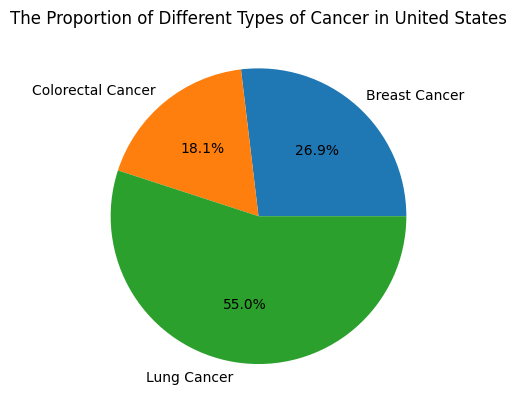

In [15]:
breast_total = df['Types.Breast.Total'].mean()
colorectal_total = df['Types.Colorectal.Total'].mean()
lung_total = df['Types.Lung.Total'].mean()
cancer_counts = [breast_total, colorectal_total, lung_total]
cancer_labels = ['Breast Cancer', 'Colorectal Cancer', 'Lung Cancer']

plt.pie(cancer_counts, labels=cancer_labels, autopct='%1.1f%%')
plt.title('The Proportion of Different Types of Cancer in United States')
plt.show()

We could see from above figures that, the lung cancer is the main cancer that lead to death among these three types of cancer in the Unite States. 
Luan Cancer is the leading cause of cancer death worldwide. An estimated 238,340 PEOPLE will be diagnosed with lung cancer in 2023 in the U.S.

We are firstly have data visualization to investigate if there are significant differences in total cancer rates among states. Use bar plot. This code assumes that the dataset includes the "State" column for the x-axis and "Total.Rate" column for the y-axis.

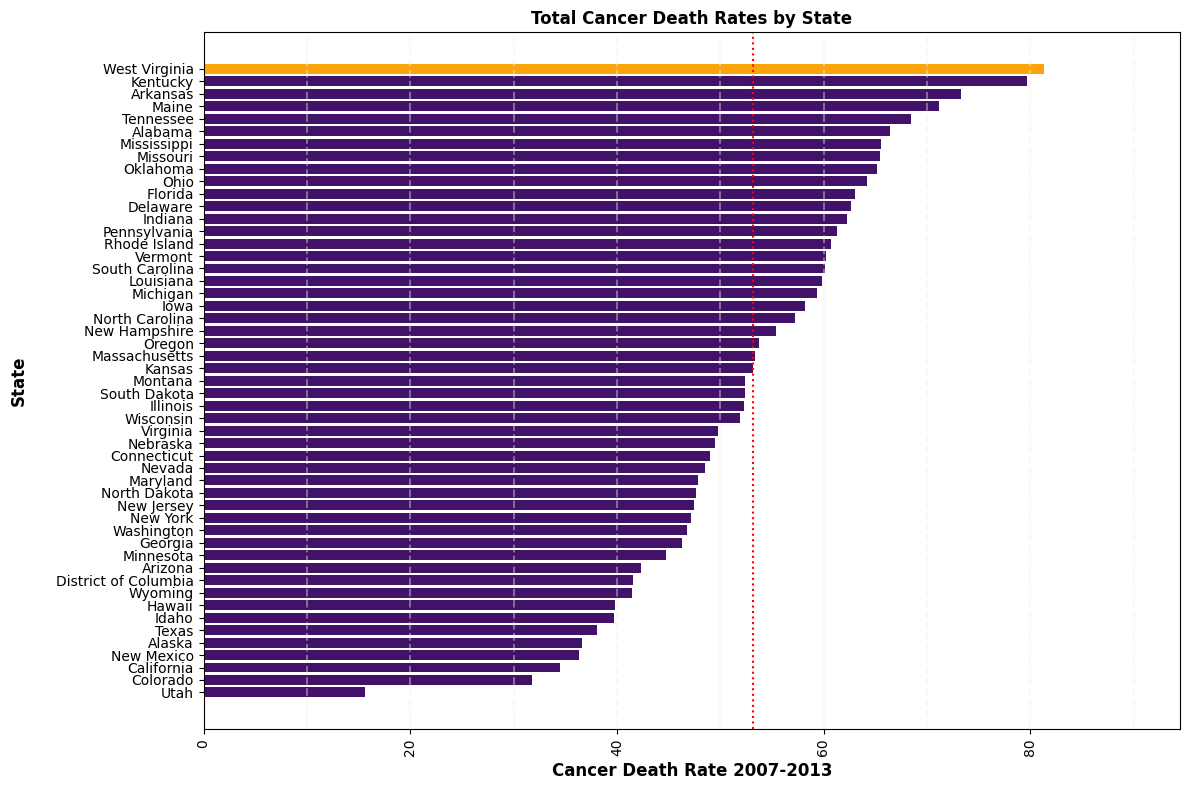

In [16]:
import matplotlib.pyplot as plt
import numpy as np

states = df["State"]
total_rates = df["Types.Lung.Total"]

# Sort the states and total_rates in descending order
sorted_indices = np.argsort(total_rates)
sorted_states = states[sorted_indices]
sorted_total_rates = total_rates[sorted_indices]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Find the index of the highest bar
highest_index = np.argmax(sorted_total_rates)

# Set colors for bars
colors = ['#421168'] * len(sorted_states)
colors[highest_index] = '#fca50a'

ax.barh(sorted_states, sorted_total_rates, color=colors)

ax.set_xlabel("Cancer Death Rate 2007-2013", weight='bold', size=12)
ax.set_ylabel("State", labelpad=20, weight='bold', size=12)
ax.set_title("Total Cancer Death Rates by State", weight='bold', size=12)
vals = ax.get_xticks()

for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
plt.axvline(x=np.nanmean(total_rates), color='red', ls='dotted')
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

As above figure shown, Utah is the state which has the lowest cancer death rate. And West Virginia is the state with highest lung cancer death rate. The dot line means average cancer rate for states. 
We are going to choose West Virginia as the state sample for our research to investigate why its cancer rate is the highest. 
Next, we are going to display a line plot to analyze trends in cancer rates across age groups in west Virginia.

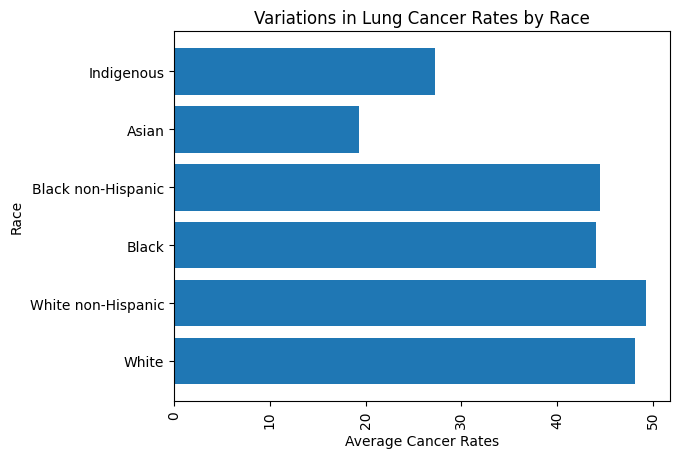

In [17]:
# Select the relevant columns for race-based analysis
race_columns = ['Rates.Race.White', 'Rates.Race.White non-Hispanic',
                'Rates.Race.Black', 'Rates.Race.Asian',
                'Rates.Race.Indigenous', 'Rates.Race.Hispanic']
race_names = ["White", "White non-Hispanic", "Black", "Black non-Hispanic", "Asian", "Indigenous"]
cancer_types = ['Lung', 'Breast', 'Colorectal']

# Create a new dataframe with race columns
race_df = df[race_columns]
cancer_type = "Lung" 
subset_df = df[[f"Types.{cancer_type}.Race.{race}" for race in race_names]]

# Calculate the average cancer rates for each race
avg_rates = subset_df.mean()

# Plot the average cancer rates by race
plt.barh(race_names, avg_rates.values)
plt.ylabel('Race')
plt.xlabel('Average Cancer Rates')
plt.title('Variations in Lung Cancer Rates by Race')
plt.xticks(rotation=90)
plt.show()

Asian has the lowest average lung cancer rate among the racial group. What is the reason? Genetic, life style or other reasons?

Next, we are going to data visualize how the lung cancer rate change across age. 

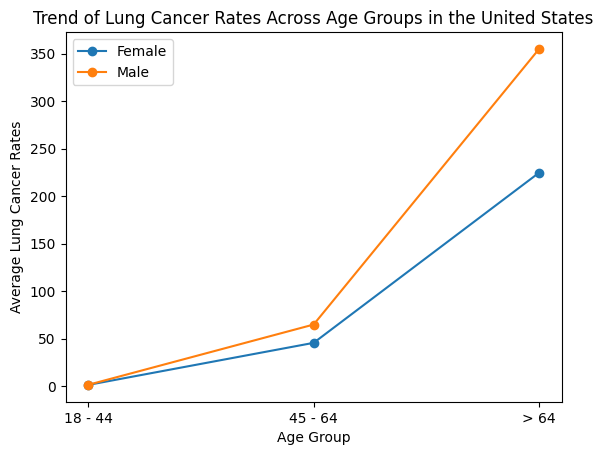

In [18]:
age_groups = ['18 - 44', '45 - 64', '> 64']

lung_rates_female = [
    df['Types.Lung.Age and Sex.Female.18 - 44'].mean(),
    df['Types.Lung.Age and Sex.Female.45 - 64'].mean(),
    df['Types.Lung.Age and Sex.Female.> 64'].mean()
]

lung_rates_male = [
    df['Types.Lung.Age and Sex.Male.18 - 44'].mean(),
    df['Types.Lung.Age and Sex.Male.45 - 64'].mean(),
    df['Types.Lung.Age and Sex.Male.> 64'].mean()
]

plt.plot(age_groups, lung_rates_female, marker='o', label='Female')
plt.plot(age_groups, lung_rates_male, marker='o', label='Male')

plt.xlabel('Age Group')
plt.ylabel('Average Lung Cancer Rates')
plt.title('Trend of Lung Cancer Rates Across Age Groups in the United States')
plt.legend()

plt.show()

From above figure, we could see no matter the line rapidly increase in the elderly group (> 64). It indicates that age supports the concept that lung cancer is a disease largely associated with aging; so the longer one lives, the greater that person's risk for developing the disease.

# Analysis

# Results

Cancer doesn’t affect all ethnic groups the same.


# Discussion

Lifestyle behaviors encompassing diet, physical exercise, sun exposure, smoking, and alcohol use and sexual practice behaviors
Socioeconomic factors including education and income level, access to health insurance, and routine medical screening and services
Genetic factors involving inherited genes and a family  history of certain diseases
Cultural factors involving practices, beliefs and in some instances mistrust of the health care system, which may prevent some from seeking preventive screening services
Age, which supports the concept that cancer is a disease largely associated with aging; so the longer one lives, the greater that person's risk for developing the disease


Due to the increasing aging of the population, the rapid development of industrialization and urbanization brought about by rapid economic growth and the deterioration of the environment, as well as the high smoking rate, the harm of lung cancer is gradually emerging.

# Refereence & Source


1. International Agency for Research on Cancer. *[GLOBOCAN Lung Cancer Facts Sheet 2020](https://gco.iarc.fr/today/data/fact-sheets-cancers)*.


2. American Cancer Society. *Cancer Facts and Figures 2023*. Atlanta; American Cancer Society: 2023.

In [73]:
df_edu=pd.read_csv('./Data/Education_level_2008_2012.csv')
df_edu.head()

,State,Completing college,Completing some college,Completing high school only,Not completing high school
0,United States,0.285,0.290,0.282,0.143
1,Alabama,0.223,0.290,0.313,0.174
2,Alaska,0.275,0.370,0.271,0.084
3,Arizona,0.266,0.344,0.244,0.146
4,Arkansas,0.198,0.284,0.351,0.167


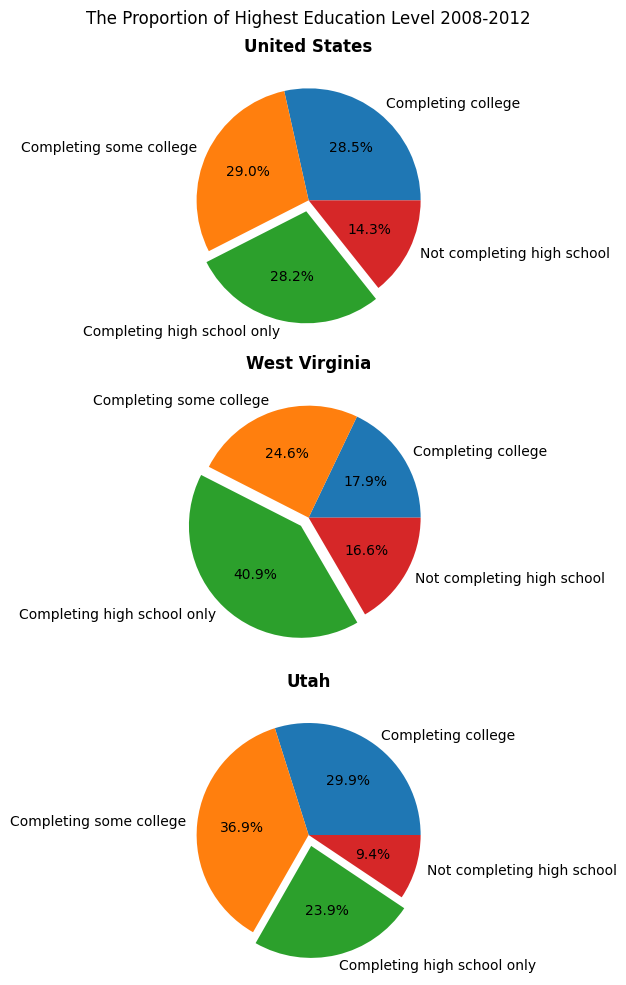

In [74]:
edu_labels = ['Completing college', 'Completing some college', 'Completing high school only', 'Not completing high school']
states = ['United States', 'West Virginia', 'Utah']

edu_data = {}
# use a dict to store the data
for state in states:
    data = df_edu[df_edu['State'] == state]
    comp_college = data['Completing college'].sum()
    comp_some_college = data['Completing some college'].sum()
    comp_high = data['Completing high school only'].sum()
    not_comp_high = data['Not completing high school'].sum()
    edu_counts = [comp_college, comp_some_college, comp_high, not_comp_high]
    edu_data[state] = edu_counts

fig, axes = plt.subplots(nrows=len(states), ncols=1, figsize=(15, 10))

for i, state in enumerate(states):
    ax = axes[i]
    edu_counts = edu_data[state]
    explode = [0 if label != 'Completing high school only' else 0.1 for label in edu_labels]  # highlight the slides
    ax.pie(edu_counts, labels=edu_labels, autopct='%1.1f%%', startangle=0, explode=explode)
    ax.set_title(state, weight='bold')

fig.suptitle('The Proportion of Highest Education Level 2008-2012')
fig.tight_layout()

plt.show()

From above pie charts, we can see that the percent of 'completing high school only' and 'not completing high school' is higher than both United State (avg) and Utah (the state has lowest cancer death rate). 
To further prove this, a line chart would be need. 


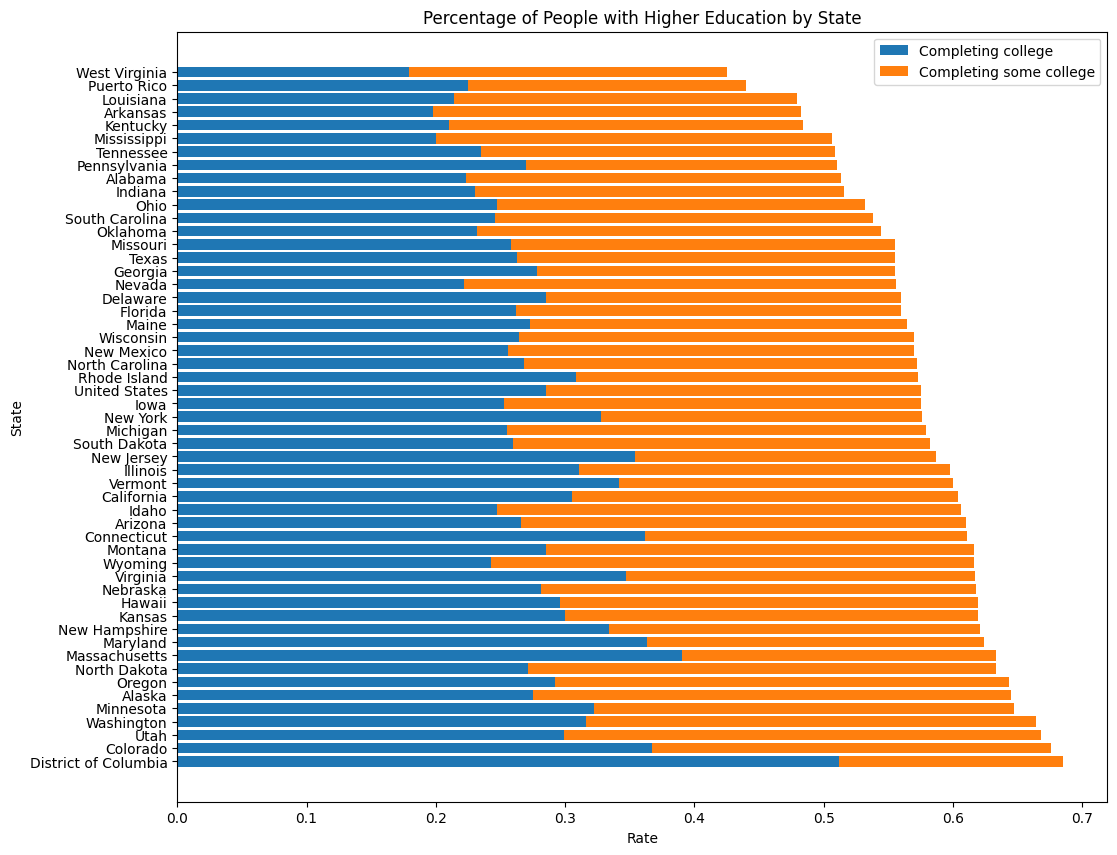

In [83]:
df_edu['Completing college + Completing some college'] = df_edu['Completing college'] + df_edu['Completing some college']
df_edu = df_edu.sort_values('Completing college + Completing some college', ascending = False)

# Set the figure size
plt.figure(figsize=(12, 10))

# Plot the stacked bar plot
plt.barh(df_edu['State'], df_edu['Completing college'], label='Completing college')
plt.barh(df_edu['State'], df_edu['Completing some college'], 
         left=df_edu['Completing college'], label='Completing some college')
# Add labels and title
plt.ylabel('State')
plt.xlabel('Rate')
plt.title('Percentage of People with Higher Education by State')

# Add legend
plt.legend()

# Show the plot
plt.show()

From above figure, we can see the percentage of people with higher education in West Virginia is the lowest state in United States. 